## EDA Visualizations

#### **Checking distributions and correlations; dealing with outliers**

In [1]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data
data = pd.read_csv('../data/data2.csv')

In [3]:
data.dtypes

overall_qual        int64
overall_cond        int64
year_remod/add      int64
exter_qual          int64
exter_cond          int64
kitchen_qual        int64
full_bath           int64
half_bath           int64
bedroom_abvgr       int64
kitchen_abvgr       int64
totrms_abvgrd       int64
fireplaces          int64
wood_deck_sf        int64
pool_area           int64
misc_val            int64
heating_qc          int64
bsmt_cond         float64
bsmtfin_sf_1      float64
total_bsmt_sf     float64
bsmt_full_bath    float64
bsmt_half_bath    float64
fireplace_qu      float64
garage_qual       float64
garage_cond       float64
saleprice           int64
house_style        object
heating            object
central_air        object
electrical         object
paved_drive        object
garage_finish      object
fence              object
bsmtfin_type_1     object
dtype: object

---

#### Histogram panels for all features

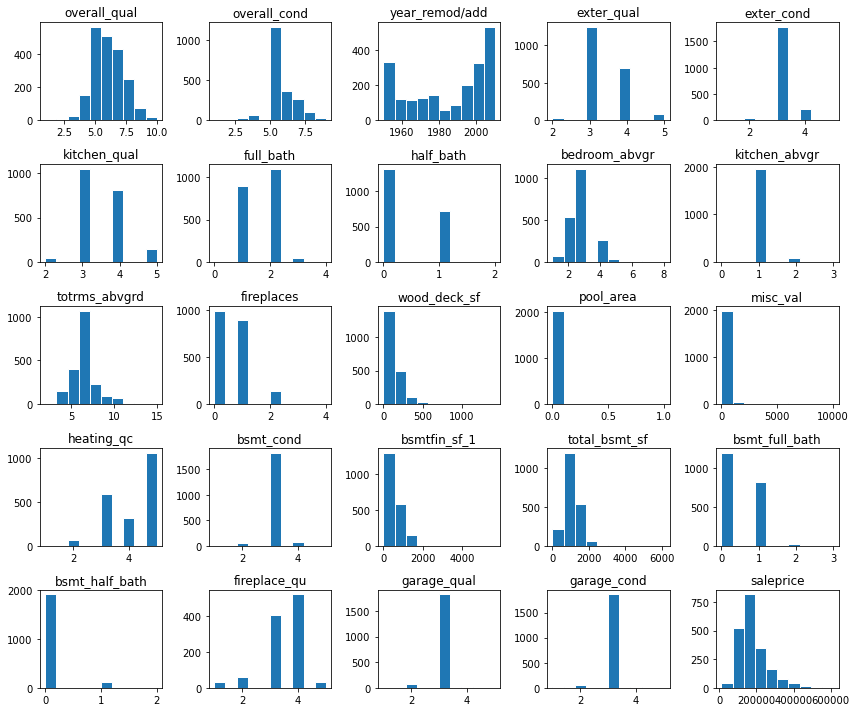

In [4]:
data.hist(figsize=(12,10), grid=False, edgecolor='white');
plt.tight_layout()

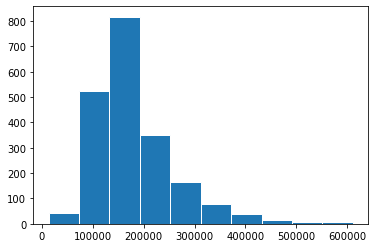

In [5]:
# SalePrice is only positive and right skewed - let's check its log
data['saleprice'].hist(edgecolor='white', grid=False);

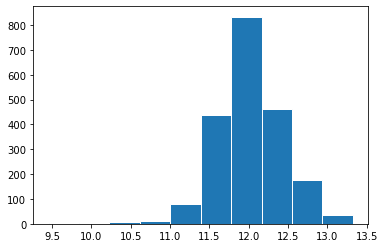

In [6]:
np.log(data['saleprice']).hist(edgecolor='white', grid=False);

---

#### Plotting numeric features against the dependent variable 'saleprice'

In [7]:
# creating lists of numeric features to be plotted

x_vars1 = ['overall_qual', 'overall_cond', 'year_remod/add', 'exter_qual', 'exter_cond'] 

x_vars2 = ['kitchen_qual', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr'] 

x_vars3 = ['totrms_abvgrd', 'fireplaces', 'wood_deck_sf', 'pool_area', 'misc_val'] 

x_vars4 = ['heating_qc', 'bsmt_cond', 'bsmtfin_sf_1', 'total_bsmt_sf', 'bsmt_full_bath']

x_vars5 = ['bsmt_half_bath', 'fireplace_qu', 'garage_qual', 'garage_cond'] 

<Figure size 648x432 with 0 Axes>

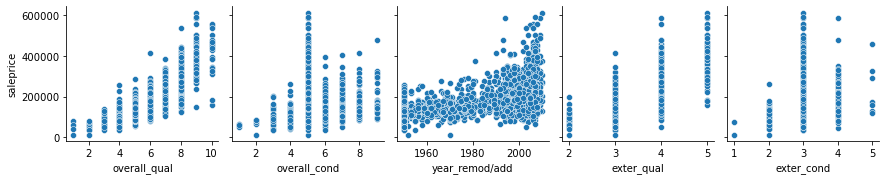

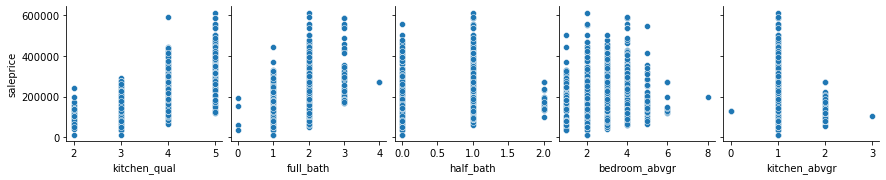

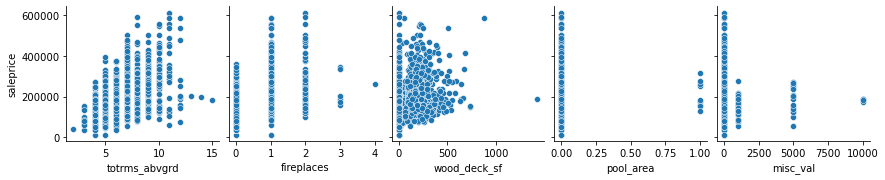

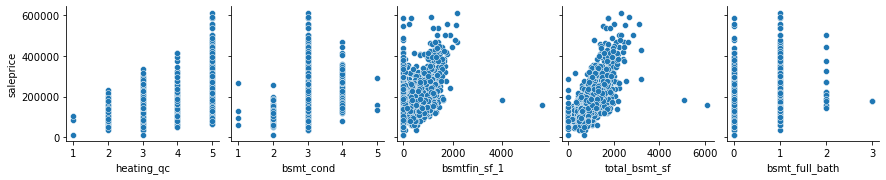

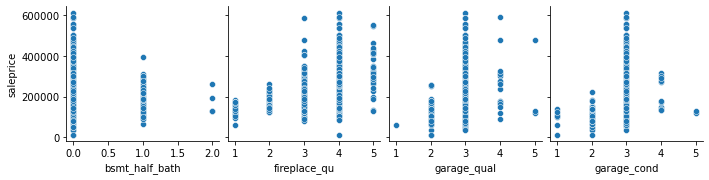

In [8]:
plt.figure(figsize=(9,6))

sns.pairplot(data=data, 
            y_vars = 'saleprice',
            x_vars = x_vars1);

sns.pairplot(data=data, 
            y_vars = 'saleprice',
            x_vars = x_vars2);

sns.pairplot(data=data, 
            y_vars = 'saleprice',
            x_vars = x_vars3);

sns.pairplot(data=data, 
            y_vars = 'saleprice',
            x_vars = x_vars4);

sns.pairplot(data=data, 
            y_vars = 'saleprice',
            x_vars = x_vars5);

---

#### Correlations heatmap

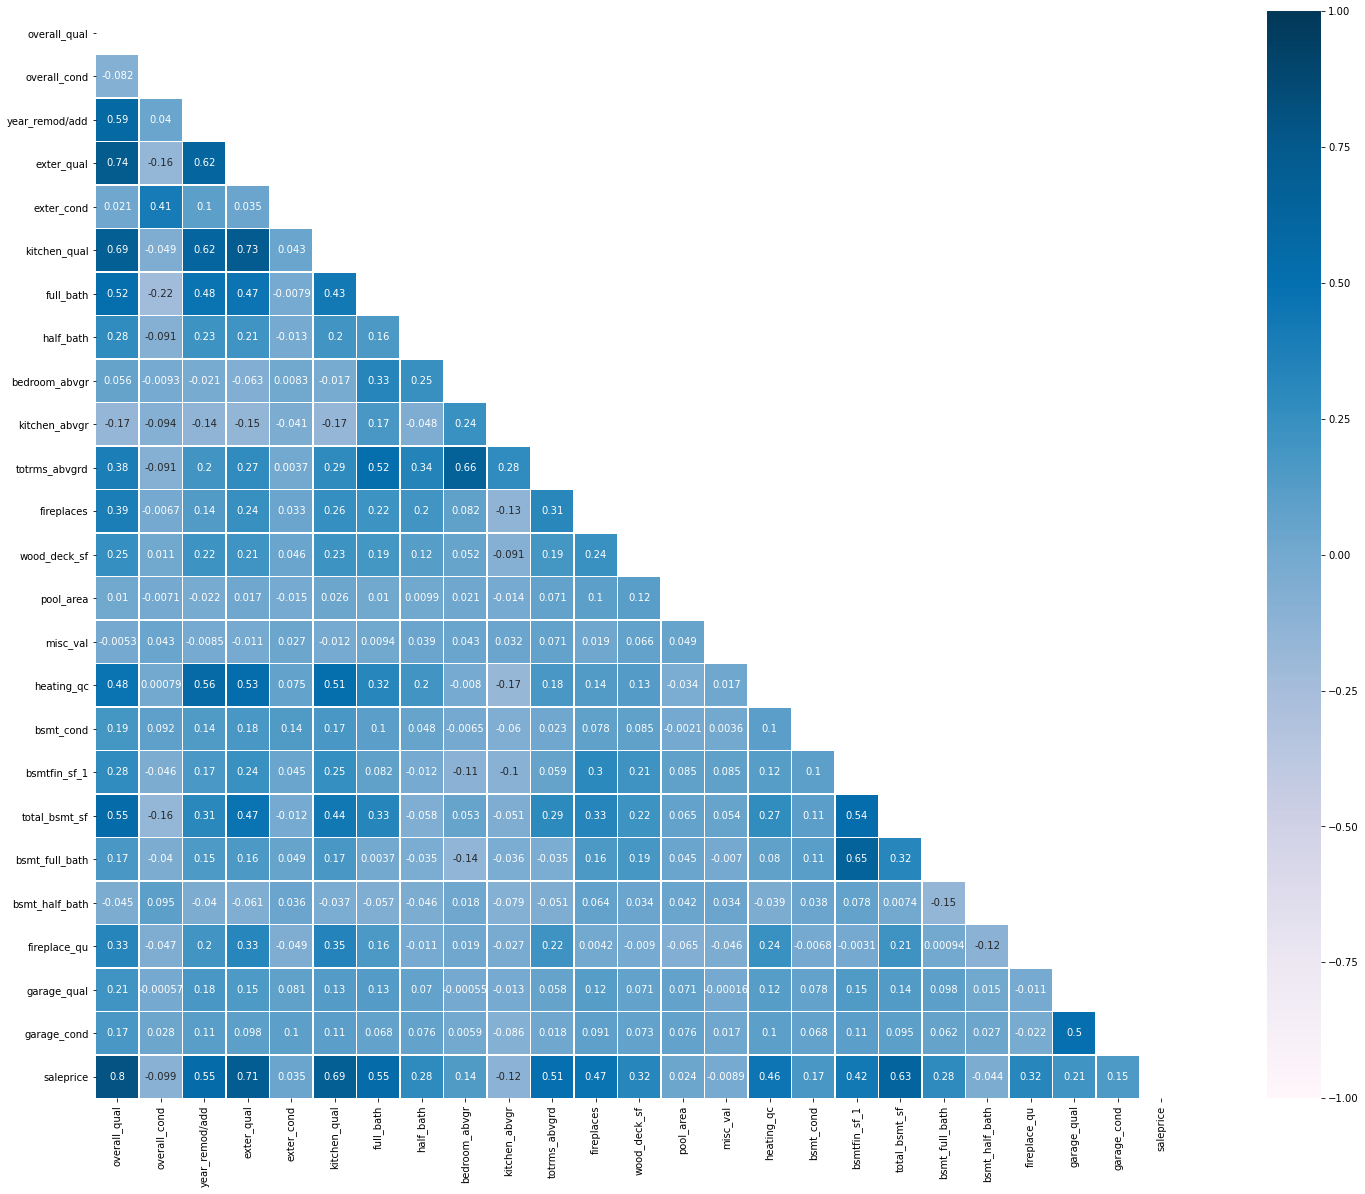

In [9]:
# heatmap for the correlations of the entire data
plt.figure(figsize = (30,20))

corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = corr,
            mask = mask,
            cmap = 'PuBu',
            annot = True,
            square = True,
            linecolor = 'white',
            linewidth = .5,
            vmin = -1,
            vmax = 1
            );

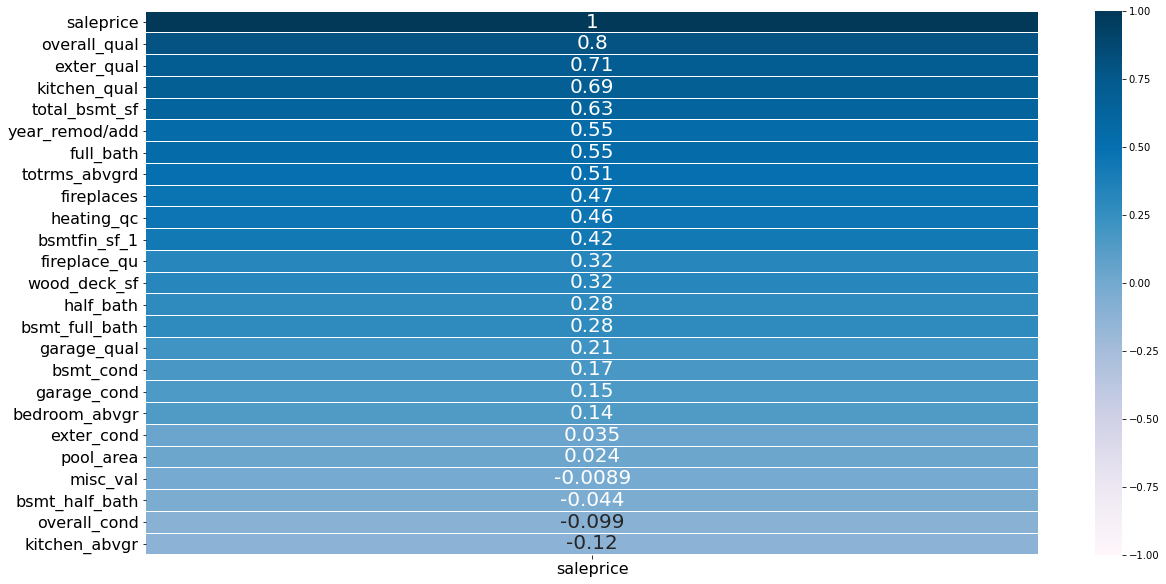

In [10]:
# heatmap for the correlations of the various features with the target
plt.figure(figsize=(20,10))
sns.heatmap(corr[['saleprice']].sort_values(by='saleprice', ascending=False),
           cmap = 'PuBu',
           annot = True, annot_kws={"size": 20},
           vmin = -1, vmax = 1, linewidth=0.1, linecolor='white');
plt.yticks(size=16);
plt.xticks(size=16);
plt.savefig('../images/heatmap.jpeg')

---

#### **Outliers - identifying and dropping**

In [11]:
data[data['wood_deck_sf'] > 1000]

,overall_qual,overall_cond,year_remod/add,exter_qual,exter_cond,kitchen_qual,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,...,garage_cond,saleprice,house_style,heating,central_air,electrical,paved_drive,garage_finish,fence,bsmtfin_type_1
963,6,6,1977,3,3,3,2,0,3,1,...,3.0,188000,split_level,GasA,Y,SBrkr,Y,Fin,MnPrv,GLQ


In [12]:
# 1 outlier - remove
data = data[data['wood_deck_sf'] <= 1000]

In [13]:
data[data['bsmtfin_sf_1'] > 3000]

,overall_qual,overall_cond,year_remod/add,exter_qual,exter_cond,kitchen_qual,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,...,garage_cond,saleprice,house_style,heating,central_air,electrical,paved_drive,garage_finish,fence,bsmtfin_type_1
957,10,5,2008,5,3,5,2,1,3,1,...,3.0,160000,story_2,GasA,Y,SBrkr,Y,Fin,no_fence,GLQ
1878,10,5,2009,5,3,5,2,1,2,1,...,3.0,183850,story_1,GasA,Y,SBrkr,Y,Fin,no_fence,GLQ


In [14]:
# 2 outliers - remove
data = data[data['bsmtfin_sf_1'] <= 3000]

In [15]:
# outlier has been removed already
data[data['total_bsmt_sf'] > 4000]

,overall_qual,overall_cond,year_remod/add,exter_qual,exter_cond,kitchen_qual,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,...,garage_cond,saleprice,house_style,heating,central_air,electrical,paved_drive,garage_finish,fence,bsmtfin_type_1


In [16]:
data[data['full_bath'] == 4]

,overall_qual,overall_cond,year_remod/add,exter_qual,exter_cond,kitchen_qual,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,...,garage_cond,saleprice,house_style,heating,central_air,electrical,paved_drive,garage_finish,fence,bsmtfin_type_1
1560,7,5,2000,3,3,3,4,2,6,2,...,3.0,269500,story_2,GasA,Y,SBrkr,Y,Fin,no_fence,GLQ
1598,7,5,2000,3,3,3,4,2,6,2,...,3.0,269500,story_2,GasA,Y,SBrkr,Y,Fin,no_fence,GLQ


In [17]:
# 2 outliers - remove
data = data[data['full_bath'] < 4]

In [18]:
data[data['bedroom_abvgr'] == 8]

,overall_qual,overall_cond,year_remod/add,exter_qual,exter_cond,kitchen_qual,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,...,garage_cond,saleprice,house_style,heating,central_air,electrical,paved_drive,garage_finish,fence,bsmtfin_type_1
855,6,7,1995,2,3,2,2,0,8,2,...,NaN,200000,story_2_half_fin,GasA,Y,FuseA,N,no_garage,no_fence,LwQ


In [19]:
# 1 outlier - remove
data = data[data['bedroom_abvgr'] < 8]

In [20]:
data[data['kitchen_abvgr'] == 3]

,overall_qual,overall_cond,year_remod/add,exter_qual,exter_cond,kitchen_qual,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,...,garage_cond,saleprice,house_style,heating,central_air,electrical,paved_drive,garage_finish,fence,bsmtfin_type_1
1353,5,5,1965,3,3,3,2,0,2,3,...,1.0,106000,story_2_half_unfin,GasA,N,FuseA,N,Unf,MnPrv,Unf


In [21]:
# 1 outlier - remove
data = data[data['kitchen_abvgr'] < 3]

In [22]:
data[data['fireplaces'] == 4]

,overall_qual,overall_cond,year_remod/add,exter_qual,exter_cond,kitchen_qual,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,...,garage_cond,saleprice,house_style,heating,central_air,electrical,paved_drive,garage_finish,fence,bsmtfin_type_1
758,7,4,1974,4,2,4,2,0,3,1,...,3.0,260000,split_level,GasA,Y,SBrkr,Y,RFn,GdPrv,ALQ


In [23]:
# 1 outlier - remove
data = data[data['fireplaces'] < 4]

In [24]:
data[data['bsmt_full_bath'] == 3]

,overall_qual,overall_cond,year_remod/add,exter_qual,exter_cond,kitchen_qual,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,...,garage_cond,saleprice,house_style,heating,central_air,electrical,paved_drive,garage_finish,fence,bsmtfin_type_1
788,5,5,1988,3,3,3,3,0,3,1,...,NaN,179000,story_1,GasA,Y,SBrkr,Y,no_garage,no_fence,GLQ
1577,5,5,1988,3,4,3,3,0,3,1,...,NaN,179000,story_1,GasA,Y,SBrkr,Y,no_garage,no_fence,GLQ


In [25]:
# 2 outliers - remove
data = data[data['bsmt_full_bath'] < 3]

In total, we removed 10 outlying data points - out of 2044 observations in our data.

---

### Save the data

In [26]:
data.to_csv('../data/data2.csv', index=False)

---